<a href="https://colab.research.google.com/github/shubham953/LSTM_SUMMARY/blob/main/news_summary_lstm_rouge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=55686d86ab5a5e8096a4bb44b82e34bd38abd6a2ff72e0922c3bd4d93d564970
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score



# <font color='gree'>**Import Libraries**</font>

In [ ]:

import pandas as pd
import pandas as pd
import numpy as np
import spacy
from IPython.display import Image


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Input, InputLayer, RNN, SimpleRNN, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split

import spacy
from time import time
import numpy as np


# <font color='gree'>**Load  data sets**</font>

In [ ]:
!gdown 1sui9RXxVsPDa4s2kooQwRGhb8taZhcgD
!gdown 1H3gdo7SLBiWE_GGD6_xcdAp2wJJFcd5L

Downloading...
From: https://drive.google.com/uc?id=1sui9RXxVsPDa4s2kooQwRGhb8taZhcgD
To: /content/news_summary.csv
100% 11.9M/11.9M [00:00<00:00, 140MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H3gdo7SLBiWE_GGD6_xcdAp2wJJFcd5L
To: /content/news_summary_more.csv
100% 41.4M/41.4M [00:00<00:00, 195MB/s]


In [ ]:
from rouge_score import rouge_scorer

summary = pd.read_csv('news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

raw = raw.rename(columns = {'headlines':'summary'})
summary = summary[['headlines', 'text']].rename(columns={'headlines':'summary'})

# Concatenate the summary and the raw files
dtf = pd.concat([raw, summary]).reset_index(drop=True)

summary.shape, raw.shape

((4514, 2), (98401, 2))

In [ ]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(sentence):

    sentence = re.sub("(\\t)", " ", str(sentence)).lower()
    sentence = re.sub("(\\r)", " ", str(sentence)).lower()
    sentence = re.sub("(\\n)", " ", str(sentence)).lower()

    # Remove - if it occurs more than one time consecutively
    sentence = re.sub("(--+)", " ", str(sentence)).lower()

    # Remove . if it occurs more than one time consecutively
    sentence = re.sub("(\.\.+)", " ", str(sentence)).lower()

    # Remove the characters - <>()|&©ø"',;?~*!
    sentence = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(sentence)).lower()

    # Remove \x9* in text
    sentence = re.sub(r"(\\x9\d)", " ", str(sentence)).lower()

    # Replace CM# and CHG# to CM_NUM
    sentence = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(sentence)).lower()

    # Remove punctuations at the end of a word
    sentence = re.sub("(\.\s+)", " ", str(sentence)).lower()
    sentence = re.sub("(\-\s+)", " ", str(sentence)).lower()
    sentence = re.sub("(\:\s+)", " ", str(sentence)).lower()
    sentence = re.sub("(\--\s+)", " ", str(sentence)).lower()

    # Remove multiple spaces
    sentence = re.sub("(\s+)", " ", str(sentence)).lower()

    return sentence

# <font color='gree'>**Get the cleaned text and Add start, end tokens**</font>


In [ ]:
dtf['cleaned_text'] = dtf.text.apply(lambda x: text_strip(x))
dtf['cleaned_summary'] = dtf.summary.apply(lambda x: '_START_ '+ text_strip(x) + ' _END_')
dtf['cleaned_summary'] = dtf['cleaned_summary'].apply(lambda x: 'sostok ' + x + ' eostok')
dtf

,summary,text,cleaned_text,cleaned_summary
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",saurav kant an alumnus of upgrad and iiit-b s ...,sostok _START_ upgrad learner switches to care...
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...,kunal shah s credit card bill payment platform...,sostok _START_ delhi techie wins free food fro...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...,new zealand defeated india by 8 wickets in the...,sostok _START_ new zealand end rohit sharma-le...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer...",with aegon life iterm insurance plan customers...,sostok _START_ aegon life iterm insurance plan...
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...,speaking about the sexual harassment allegatio...,sostok _START_ have known hirani for yrs what ...
...,...,...,...,...
102910,Rasna seeking ?250 cr revenue from snack categ...,Fruit juice concentrate maker Rasna is eyeing ...,fruit juice concentrate maker rasna is eyeing ...,sostok _START_ rasna seeking 250 cr revenue fr...
102911,Sachin attends Rajya Sabha after questions on ...,Former Indian cricketer Sachin Tendulkar atten...,former indian cricketer sachin tendulkar atten...,sostok _START_ sachin attends rajya sabha afte...
102912,Shouldn't rob their childhood: Aamir on kids r...,"Aamir Khan, while talking about reality shows ...",aamir khan while talking about reality shows o...,sostok _START_ shouldn t rob their childhood a...
102913,"Asha Bhosle gets ?53,000 power bill for unused...",The Maharashtra government has initiated an in...,the maharashtra government has initiated an in...,sostok _START_ asha bhosle gets 53 000 power b...


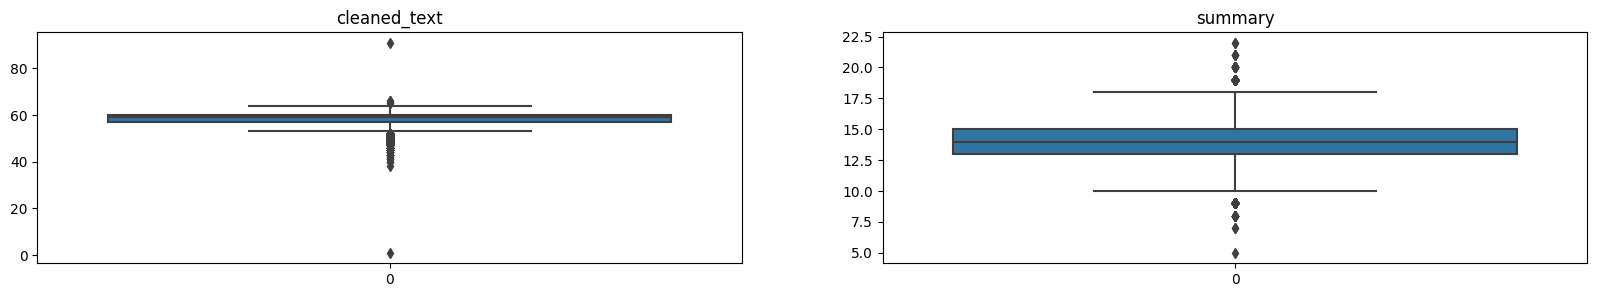

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(20,3))
sns.boxplot(dtf.text.str.split().str.len(), ax=ax[0])
ax[0].set_title('cleaned_text')
sns.boxplot(dtf.cleaned_summary.str.split().str.len(), ax=ax[1])
ax[1].set_title('summary')

fig.show()

In [ ]:

config = {'min_text_len':30,
          'max_text_len':60,
          'max_summary_len':25,
          'latent_dim' : 300,
          'embedding_dim' : 200}

Filter text as per config

In [ ]:
print(f'Before filtering: {dtf.shape}')
pre = dtf.loc[((dtf['text'].str.split(" ").str.len()>config['min_text_len'])&(dtf['text'].str.split(" ").str.len()<config['max_text_len']))].reset_index(drop=True)
print(f'After filtering: {pre.shape}')

Before filtering: (102915, 4)
After filtering: (54575, 4)


### Distribution of words after filtering

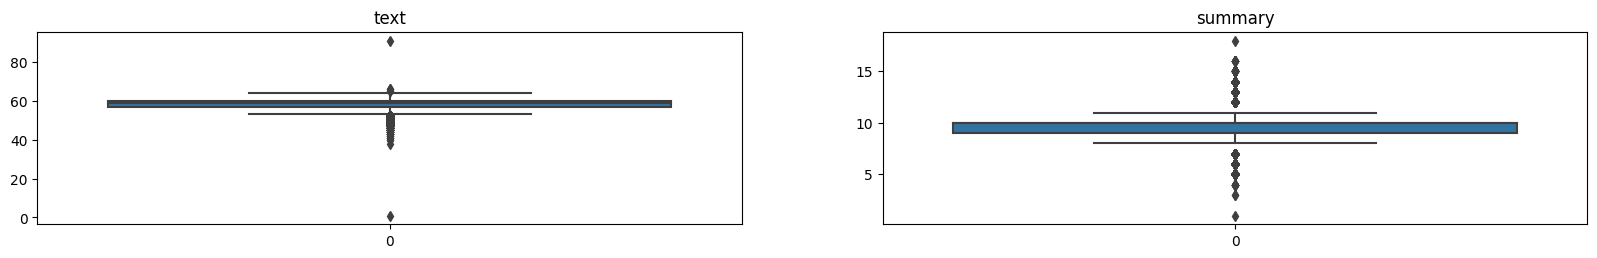

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(20,2.5))
sns.boxplot(dtf.text.str.split().str.len(), ax=ax[0])
ax[0].set_title('text')
sns.boxplot(dtf.summary.str.split().str.len(), ax=ax[1])
ax[1].set_title('summary')

fig.show()

### Let's look at a sample

In [ ]:
ind = 1
print(f'Text: {pre.text[ind]}')
print()
print(f'Summary: {pre.summary[ind]}')
print()
print(f'Text length: {len(pre.text[ind].split())}')
print(f'Summary length: {len(pre.summary[ind].split())}')

Text: India recorded their lowest ODI total in New Zealand after getting all out for 92 runs in 30.5 overs in the fourth ODI at Hamilton on Thursday. Seven of India's batsmen were dismissed for single-digit scores, while their number ten batsman Yuzvendra Chahal top-scored with 18*(37). India's previous lowest ODI total in New Zealand was 108.

Summary: India get all out for 92, their lowest ODI total in New Zealand

Text length: 56
Summary length: 13


# Now see the cleaned data

In [ ]:
print(pre.shape)
post_pre = pre[((pre.cleaned_text.str.split().str.len()<=config['max_text_len']) & (pre.summary.str.split().str.len()<=(config['max_summary_len']+4)))].copy()
post_pre = post_pre.reset_index(drop=True)
print(post_pre.shape)

post_pre = post_pre.drop(['text', 'summary'], axis=1)
post_pre = post_pre.rename(columns = {'cleaned_text':'text',
                                      'cleaned_summary':'summary'})
post_pre

(54575, 4)
(47503, 4)


,text,summary
0,pakistani singer rahat fateh ali khan has deni...,sostok _START_ rahat fateh ali khan denies get...
1,india recorded their lowest odi total in new z...,sostok _START_ india get all out for 92 their ...
2,andhra pradesh cm n chandrababu naidu has said...,sostok _START_ called pm modi sir 10 times to ...
3,isha ghosh an 81-year-old member of bharat sco...,sostok _START_ 81-yr-old woman conducts physic...
4,filmmaker karan johar and actress tabu turned ...,sostok _START_ karan johar tabu turn showstopp...
...,...,...
47498,indian captain virat kohli on friday got out w...,sostok _START_ virat kohli out for a duck for ...
47499,srinivas kunchubhotla 32 an indian engineer wa...,sostok _START_ indian shot dead in us over all...
47500,an investigation by india today has unmasked a...,sostok _START_ prosthetic fingers on sale to r...
47501,a ticket collector on thursday allegedly bit o...,sostok _START_ ticket collector bites off seni...



# <font color='gree'>**Split the train and validation dataset**</font>

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(np.array(post_pre["text"]),
                                            np.array(post_pre["summary"]),
                                            test_size=0.1,
                                            random_state=0,
                                            shuffle=True
                                           )

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((42752,), (4751,), (42752,), (4751,))

# <font color='gree'>**Split the train and validation dataset**</font>

In [ ]:
def get_rare_words(text_col):

    # Prepare a tokenizer on testing data
    text_tokenizer = Tokenizer()
    text_tokenizer.fit_on_texts(list(text_col))

    thresh = 5

    cnt = 0
    tot_cnt = 0

    for key, value in text_tokenizer.word_counts.items():
        tot_cnt = tot_cnt + 1
        if value < thresh:
            cnt = cnt + 1

    print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

    return cnt, tot_cnt

# <font color='gree'>**Tokenize the Test dataset**</font>

In [ ]:
x_train_cnt, x_train_tot_cnt = get_rare_words(text_col=x_train)

% of rare words in vocabulary: 64.18588816069453


In [ ]:
# Prepare a tokenizer,  -- by not considering the rare words
x_tokenizer = Tokenizer(num_words=x_train_tot_cnt - x_train_cnt)
# x_tokenizer = Tokenizer(num_words = x_train_tot_cnt)
x_tokenizer.fit_on_texts(list(x_train))

# Convert text sequences to integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_train)
x_val_seq = x_tokenizer.texts_to_sequences(x_valid)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=config['max_text_len'], padding='post')
x_val = pad_sequences(x_val_seq, maxlen=config['max_text_len'], padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 21040


# <font color='gree'>**Tokenize the validation dataset**</font>

In [ ]:
y_train_cnt, y_train_tot_cnt = get_rare_words(text_col=y_train)

% of rare words in vocabulary: 66.54219279334771


In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=y_train_tot_cnt - y_train_cnt)
# y_tokenizer = Tokenizer(num_words=y_train_tot_cnt)
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences to integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_train)
y_val_seq = y_tokenizer.texts_to_sequences(y_valid)

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=config['max_summary_len'], padding='post')
y_val = pad_sequences(y_val_seq, maxlen=config['max_summary_len'], padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 8692



# <font color='gree'>**Initialize the Encoder and Decoder architecture**</font>

In [ ]:
latent_dim = config['latent_dim']
embedding_dim = config['embedding_dim']
max_text_len = config['max_text_len']
max_summary_len = config['max_summary_len']

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 60, 200)      4208000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 60, 300),    601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              


# <font color='gree'>**Compile and train the model**</font>

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_name = "./model.h5"

save_model = tf.keras.callbacks.ModelCheckpoint(filepath=model_name,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                verbose=1)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=100,
    callbacks=[es, save_model],
    batch_size=1024,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]),
    )

Epoch 1/100
42/42 [==============================] - ETA: 0s - loss: 4.9724 - accuracy: 0.5166
Epoch 1: val_loss improved from inf to 3.34691, saving model to ./model.h5
42/42 [==============================] - 88s 2s/step - loss: 4.9724 - accuracy: 0.5166 - val_loss: 3.3469 - val_accuracy: 0.5408
Epoch 2/100
42/42 [==============================] - ETA: 0s - loss: 3.3051 - accuracy: 0.5431
Epoch 2: val_loss improved from 3.34691 to 3.30064, saving model to ./model.h5
42/42 [==============================] - 81s 2s/step - loss: 3.3051 - accuracy: 0.5431 - val_loss: 3.3006 - val_accuracy: 0.5516
Epoch 3/100
42/42 [==============================] - ETA: 0s - loss: 3.1721 - accuracy: 0.5881
Epoch 3: val_loss improved from 3.30064 to 3.05265, saving model to ./model.h5
42/42 [==============================] - 78s 2s/step - loss: 3.1721 - accuracy: 0.5881 - val_loss: 3.0526 - val_accuracy: 0.6270
Epoch 4/100
42/42 [==============================] - ETA: 0s - loss: 2.9991 - accuracy: 0.6272



# <font color='gree'>**Plot the train and validation loss**</font>

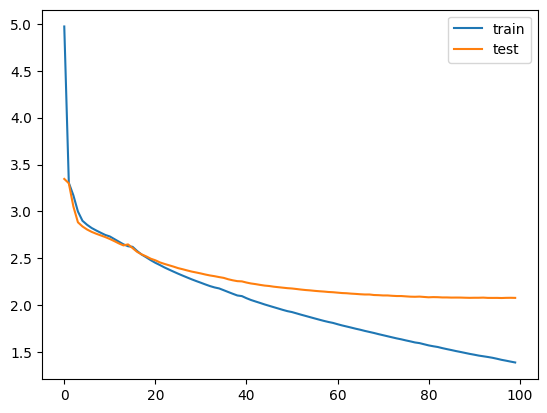

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


# <font color='gree'>**Load the saved model**</font>

In [ ]:
model.load_weights('./model.h5')


# <font color='gree'>**Reverse encode the index to their tokens**</font>

In [ ]:
reverse_source_word_index = x_tokenizer.index_word
reverse_target_word_index = y_tokenizer.index_word
target_word_index = y_tokenizer.word_index

# <font color='gree'>**Create the Decoder inference architecture**</font>

In [ ]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq, verbose=0)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c], verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [ ]:
# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if (i != 0) and (i != target_word_index['sostok']) and (i != target_word_index['eostok']):
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# <font color='gree'>**Prediction summary**</font>

In [ ]:
actual = []
predicted = []
for i in range(0, 50):
    print ('Review:', seq2text(x_tr[i]))

    actual.append(seq2summary(y_tr[i]))
    print ('Original summary:', actual[-1])

    predicted.append(decode_sequence(x_tr[i].reshape(1, config['max_text_len'])))
    print ('Predicted summary:', predicted[-1])
    print()

prediction_df = pd.DataFrame({'Actual':actual, 'Predicted':predicted})
prediction_df.head(10)

Review: actress huma qureshi has said that she doesn t chase success and chases excellence which is more important to her i think people should just keep working hard enough to stay relevant she added i am just having a good time with whatever opportunity is coming my way rather than analysing too much about my journey she further said 
Original summary: start i do not chase success i chase excellence huma end 
Predicted summary:  start i m not a baby on i was a boy ayushmann khurrana end

Review: an etihad airways pilot passed away on wednesday while operating a cargo flight from abu dhabi to amsterdam after the captain became in the flight the first officer issued an emergency call and safely diverted the aircraft to kuwait the airline said in a statement the pilot was pronounced dead after receiving medical treatment the statement added 
Original summary: start pilot dies on board airways plane mid air end 
Predicted summary:  start video shows plane crashes into sea in us end

Revi

,Actual,Predicted
0,start i do not chase success i chase excellenc...,start i m not a baby on i was a boy ayushmann...
1,start pilot dies on board airways plane mid ai...,start video shows plane crashes into sea in u...
2,start my moment srk on pic with christopher end,start srk s son plays piano in his lifetime a...
3,start 30 years since teen beat air defence to ...,start indian origin man killed in us plane cr...
4,start reliance to raise ã¢ââ¹25 000 crore to ...,start reliance jio to buy stake in india s ov...
5,start ola losses to ã¢ââ¹2 crore during 2015 ...,start ola uber lyft to pay ã¢ââ¹1 crore for ...
6,start shahid shares video of himself dancing t...,start ranveer shares pic with daughter s daug...
7,start trump mistakes france s for italy end,start trump s son banned from us for russian ...
8,start kohli clarifies his aussies not friends ...,start kohli s son tweets user on his own come...
9,start amazon has only three women on its 10 pe...,start amazon india s ai to be charged with fo...


# <font color='gree'>**Rouge score**</font>

In [ ]:
r_score = []
rouge_pr = []
rouge_rc = []
rouge_f = []

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

for indx, data in prediction_df.iterrows():
    r_score = scorer.score(data.Actual, data.Predicted)
    pr = list(r_score['rouge1'])[0]
    rc = list(r_score['rouge1'])[1]
    fmeas = list(r_score['rouge1'])[2]

    rouge_pr.append(pr)
    rouge_rc.append(rc)
    rouge_f.append(fmeas)

prediction_df['rouge_pr'] = rouge_pr
prediction_df['rouge_rc'] = rouge_rc
prediction_df['rouge_f'] = rouge_f
prediction_df.head(10)

,Actual,Predicted,rouge_pr,rouge_rc,rouge_f
0,start i do not chase success i chase excellenc...,start i m not a baby on i was a boy ayushmann...,0.357143,0.454545,0.400000
1,start pilot dies on board airways plane mid ai...,start video shows plane crashes into sea in u...,0.300000,0.300000,0.300000
2,start my moment srk on pic with christopher end,start srk s son plays piano in his lifetime a...,0.272727,0.333333,0.300000
3,start 30 years since teen beat air defence to ...,start indian origin man killed in us plane cr...,0.230769,0.230769,0.230769
4,start reliance to raise ã¢ââ¹25 000 crore to ...,start reliance jio to buy stake in india s ov...,0.384615,0.384615,0.384615
5,start ola losses to ã¢ââ¹2 crore during 2015 ...,start ola uber lyft to pay ã¢ââ¹1 crore for ...,0.454545,0.500000,0.476190
6,start shahid shares video of himself dancing t...,start ranveer shares pic with daughter s daug...,0.272727,0.300000,0.285714
7,start trump mistakes france s for italy end,start trump s son banned from us for russian ...,0.454545,0.625000,0.526316
8,start kohli clarifies his aussies not friends ...,start kohli s son tweets user on his own come...,0.363636,0.400000,0.380952
9,start amazon has only three women on its 10 pe...,start amazon india s ai to be charged with fo...,0.250000,0.230769,0.240000


## Not Suitable state of the art model
## Reason having less dataset
## we will improve it further via complex model

In [1]:
!git remote add origin https://github.com/shubham953/LSTM_SUMMARY.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
